In [1]:
import pandas as pd

mydata = pd.read_csv("NEISS2014.csv") #Reading the dataset in a dataframe using Pandas

In [2]:
mydata.head(5) # take a quick look at the data

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
0,141200216,10/23/14,63,99.704,M,21,Female,None listed,NaN,62,NaN,75,1,1,0,679,1807,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...
1,140117851,1/4/14,63,81.576,M,62,Female,White,NaN,57,NaN,79,1,1,0,1807,115,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...
2,150144993,8/17/14,63,99.704,M,21,Female,None listed,NaN,57,NaN,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT
3,150230176,7/27/14,63,99.704,M,30,Female,None listed,NaN,64,NaN,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...
4,141220717,9/8/14,63,99.704,M,16,Male,None listed,NaN,57,NaN,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND


In [3]:
mydata['body_part'].describe()

count    65499.000000
mean        64.188873
std         24.066252
min          0.000000
25%         35.000000
50%         75.000000
75%         82.000000
max         94.000000
Name: body_part, dtype: float64

# Question 1 


# What are the top three body parts most frequently represented in this dataset?
Answer: Most frequent three body parts are 75 which stands for head, 76 face, and 92 finger.

# What are the top three body parts that are least frequently represented?
Answer: 84 stands for 25%-50% of body, 38 public region, 0 internal. Even 87 is the third least frequently body part but it is actually not record.

In [4]:
mydata['body_part'].value_counts() #choose body_part column and count each of them. Data type is integer.

75    9891
76    5786
92    5783
79    5717
31    3868
37    3781
35    3616
82    3369
83    3090
30    2675
33    2561
36    2239
34    2116
32    1612
85    1422
93    1280
88    1254
89    1080
77     847
94     782
81     756
80     745
0      549
87     390
38     286
84       4
dtype: int64

# Question 2

In [5]:
skateboard = mydata[mydata['narrative'].str.contains("SKATEBOARD")] 
#Injured with skateboard means the narrative of this case should contain key words related with skateboard.

# How many injuries in this dataset involve a skateboard?
Answer: 466.

In [6]:
print skateboard.shape[0] #Look at how many injures are caused by skateboard.

466


In [7]:
len(skateboard) # Another way to see the same result.

466

# Of those injuries, what percentage were male and what percentage were female?
Answer: 17.5% were female and 82.4% were male.

In [8]:
skateboard.groupby('sex').size()*100/len(skateboard)
#I group the data by the column of sex to calculate their percentage in skateboard accident.

sex
Female    17.596567
Male      82.403433
dtype: float64

# What was the average age of someone injured in an incident involving a skateboard?
Answer: 18 years old.

In [9]:
skateboard['age'].mean() # average age of those skateboard injures are only 18 years old.

17.991416309012877

# Question 3

In [10]:
#In this case, disposition #4 means treated and admitted for hospitalization

In [11]:
hospital= mydata.loc[mydata['disposition'] == 4] 
#Choose records with treated for hospitalization and assign them to hospital

In [12]:
disposition_group4= hospital.groupby(['diag','disposition']).size()
#Group all the hospital records by diagnosis and disposition to see their aggregation result. 

In [13]:
diag_group= mydata.groupby(['diag']).size()
#Calculate the total numbers for each diagnosis in original data

In [14]:
hospital_rate = disposition_group4.div(diag_group, level='diag') * 100
#The patients treated for hospitalization divided by total patients in each diagnosis category
#to calculate hospitalization rate.

In [15]:
hospital_rate.order(ascending = False) #Order by hospitalization rate for each diagnosis category.

diag  disposition
69    4              42.592593
57    4              18.602979
50    4              16.000000
68    4              12.154696
62    4              11.873351
41    4              11.594203
47    4              10.526316
67    4               9.375000
61    4               8.585859
58    4               7.865169
65    4               7.647059
42    4               7.575758
71    4               7.549261
48    4               7.397959
51    4               5.273438
52    4               4.682274
55    4               4.352227
72    4               3.560831
63    4               2.358491
53    4               2.038324
66    4               1.562500
59    4               1.503210
60    4               0.796813
56    4               0.787402
74    4               0.483092
64    4               0.416425
dtype: float64

# What diagnosis had the highest hospitalization rate? 
Answer: Submersion(including Drowning) has the highest hospitalization rate as more than 45%.

In [16]:
leaving = mydata.loc[mydata['disposition'] == 6] #Same logic for people left without being see.
disposition_group6= leaving.groupby(['diag','disposition']).size()
leaving_rate = disposition_group6.div(diag_group, level='diag') * 100

In [17]:
leaving_rate.order(ascending = False)

diag  disposition
68    6              3.314917
71    6              3.165025
42    6              3.030303
73    6              2.857143
49    6              2.325581
58    6              2.247191
51    6              1.953125
65    6              1.764706
50    6              1.600000
60    6              1.593625
48    6              1.275510
62    6              1.187335
63    6              1.100629
59    6              0.999431
56    6              0.787402
72    6              0.593472
53    6              0.488446
74    6              0.483092
52    6              0.468227
55    6              0.303644
41    6              0.207039
64    6              0.203370
57    6              0.061633
dtype: float64

# What diagnosis most often concluded with the individual leaving without being seen?
Answer: Poisoning patients most often concluded as left without medical advice with a rate of 3.3%.

In [21]:
"""I believe the probability of patients left without medical advice for different diagnosis are almost the same.
Poisoning could often concluded as hospitalization and also sometimes they doesn't need any medical care.
Amputation and Fracture patients often stay in hospital as well.
"""

"I believe the probability of patients left without medical advice for different diagnosis are almost the same.\nPoisoning could often concluded as hospitalization and also sometimes they doesn't need any medical care.\nAmputation and Fracture patients often stay in hospital as well.\n"

# Question 4 Visualize any existing relationship between age and reported injuries

In [22]:
%matplotlib inline 

In [23]:
#get matplotlib graphics to show up inline.

In [24]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as pyplot

In [25]:
aged_data= mydata.loc[mydata['age'] <= 100] 
#I found some rows contain people older than 100 years old, and I believe they were typos so I delete them.

In [26]:
x = aged_data['age']

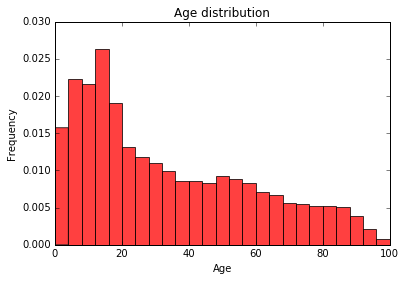

In [27]:
pyplot.hist(x, 25, normed=1, facecolor='r', alpha=0.75) 
#Create a general age distribution of all the patients first, and each bar chart contains a range of 4 years.

pyplot.title("Age distribution")
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")

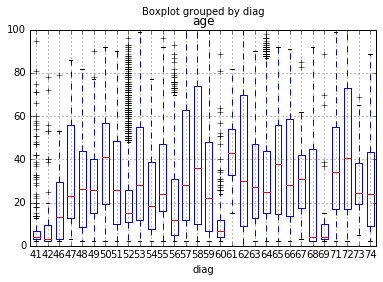

In [28]:
plot1 = aged_data.boxplot(column='age', by = 'diag', widths = 0.6)
#Age box plot distribution categorized by diagnosis,
#we can see 41(Ingested foreign object),42(Aspirated foreign object),60(Dental injury) 
#and 69(Submersion (including Drowning)) have lots of teenager patients.